# Visualizing glacier retreat from WGMS's dataset (https://wgms.ch/data_databaseversions/)

In [ ]:
# 12/02/2023 - Visualizing Data from WGMS's glacier retreat changes.csv dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('final_change.csv', header=0)

# Subset relevant columns
df_change = df[['POLITICAL_UNIT', 'WGMS_ID', 'YEAR', 'THICKNESS_CHG',	'VOLUME_CHANGE']]
df_f = df_change.sort_values(by='YEAR')
df_f.iloc[[0]]["WGMS_ID"]


55963    559
Name: WGMS_ID, dtype: int64

In [ ]:
# remove repeat glaciers with WGMS_ID
df_f_clean = []
for i in range(len(df_f)):
  if i == 0:
    df_f_clean.append(df_f.iloc[[i]])
    id_initial = df_f.iloc[[i]]["WGMS_ID"]
  else:
    if df_f.iloc[[i]]["WGMS_ID"] == id_initial:
      break
    else:
      df_f_clean.append(df_f.iloc[[i]])
      id = df_f.iloc[[i]]["WGMS_ID"]
      if df_f.iloc[[i]]["WGMS_ID"] == id:
        break
      else:
        df_f_clean.append(df_f.iloc[[i]])


ValueError: ignored

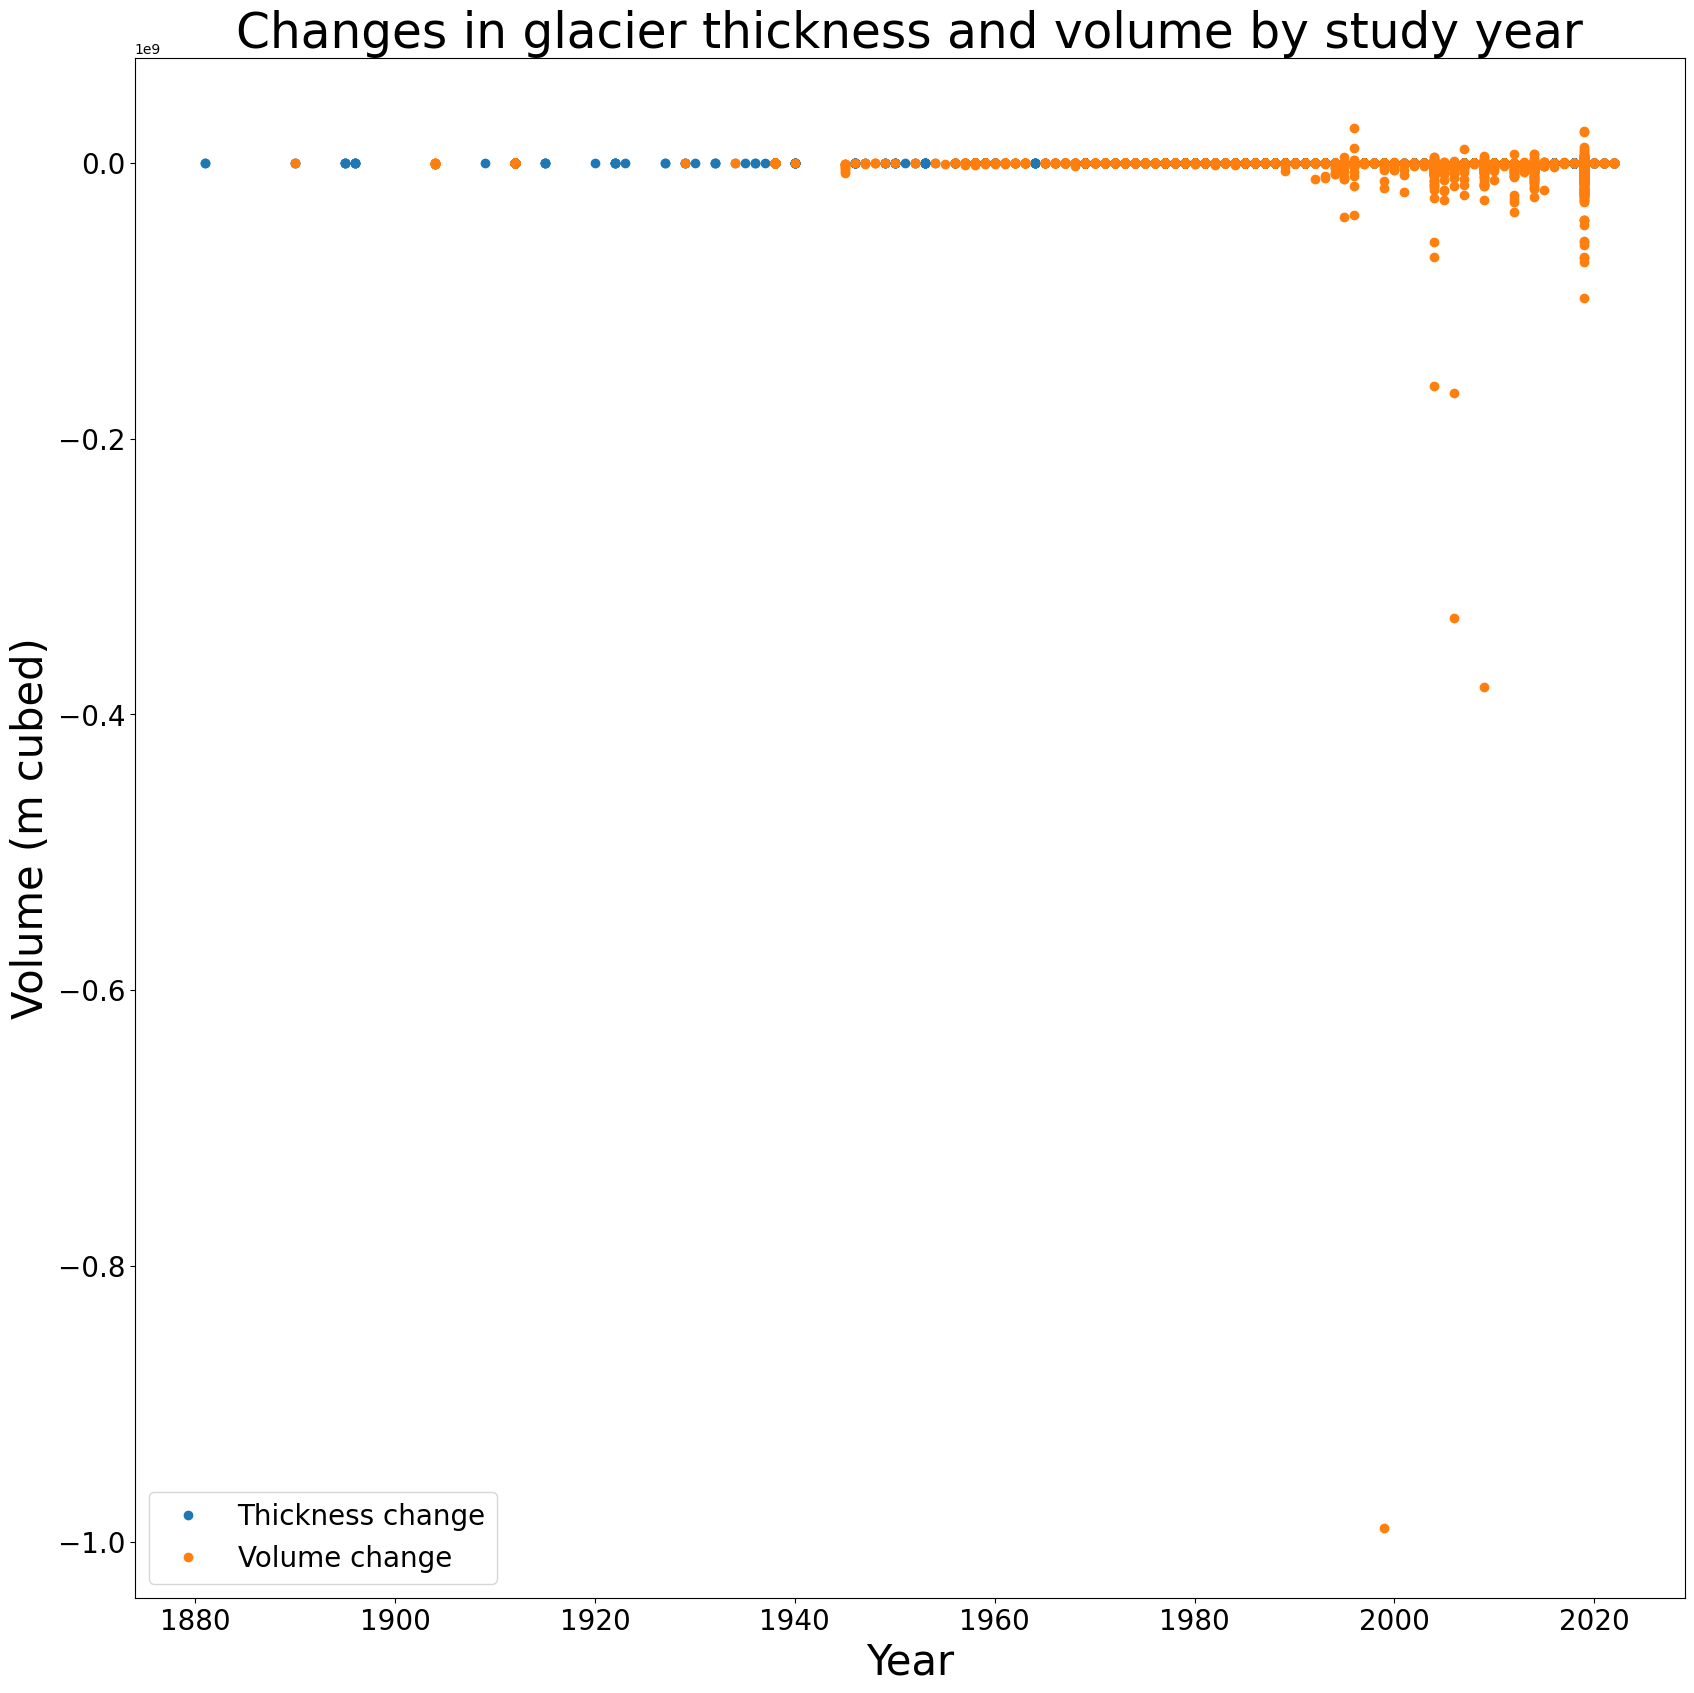

In [ ]:
# plot thickness and volume changes by year

x = df_f['YEAR']
y = df_f[['THICKNESS_CHG', 'VOLUME_CHANGE']]
plt.figure(figsize=(20, 20))
plt.plot(x, y, 'o', label=['Thickness change', 'Volume change'])

plt.title("Changes in glacier thickness and volume by study year", fontsize=35)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Volume (m cubed)", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

The above graph shows

In [ ]:
# subset years at and after 1990
df_2 = df_f[(df_f['YEAR'] >= 1990)]
df_2

,POLITICAL_UNIT,YEAR,THICKNESS_CHG,VOLUME_CHANGE
958405,SE,1990,-1944.000000,-180.000000
958403,SE,1990,-4405.000000,-639.000000
767007,KZ,1990,-2190.000000,-59.000000
959526,SJ,1990,-24980.000000,NaN
767009,KZ,1990,-1200.000000,-28.000000
...,...,...,...,...
767478,KZ,2022,-850.000000,-260.314200
717642,IT,2022,-467.000000,-18.196000
767479,KZ,2022,-100.413921,-23.852624
541493,CO,2022,-3650.000000,NaN


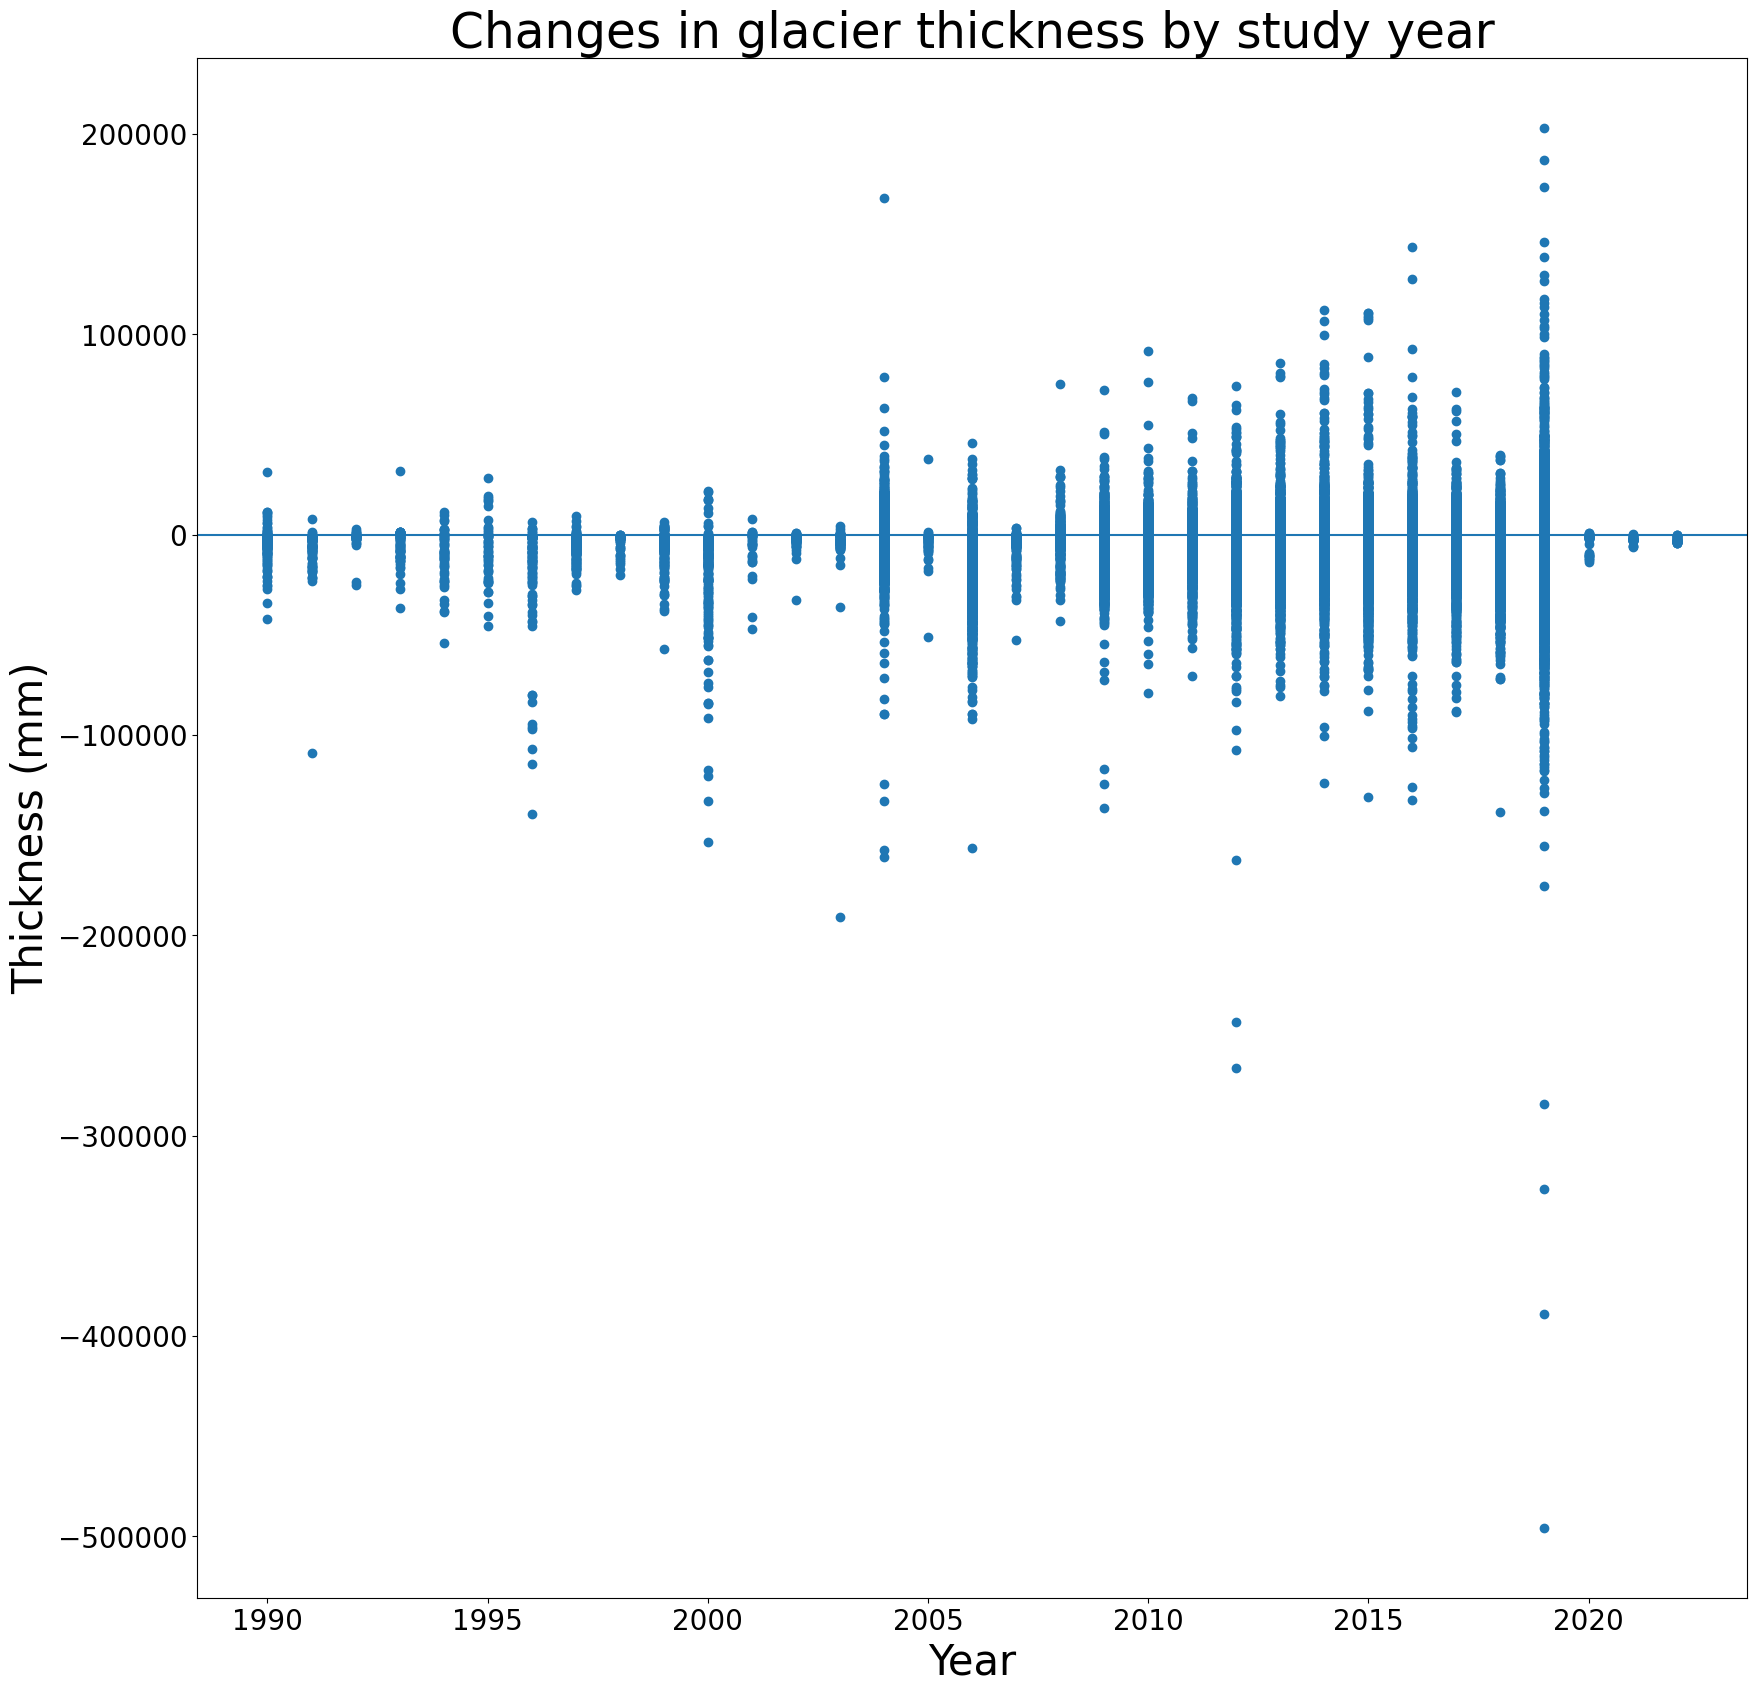

In [ ]:
# plot again

x = df_2['YEAR']
y = df_2[['THICKNESS_CHG']]
plt.figure(figsize=(20, 20))
plt.plot(x, y, 'o')

plt.title("Changes in glacier thickness by study year", fontsize=35)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Thickness (mm)", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y = 0, linestyle = '-')
plt.show()

In [ ]:
# Remove volume outlier
df_vol = df_2[(df_2['VOLUME_CHANGE'] > -100000000)]
df_vol

,POLITICAL_UNIT,YEAR,THICKNESS_CHG,VOLUME_CHANGE
958405,SE,1990,-1944.000000,-180.000000
958403,SE,1990,-4405.000000,-639.000000
767007,KZ,1990,-2190.000000,-59.000000
767009,KZ,1990,-1200.000000,-28.000000
959504,SJ,1990,-4815.000000,-26800.000000
...,...,...,...,...
767477,KZ,2022,-1685.250000,-526.996213
767478,KZ,2022,-850.000000,-260.314200
717642,IT,2022,-467.000000,-18.196000
767479,KZ,2022,-100.413921,-23.852624


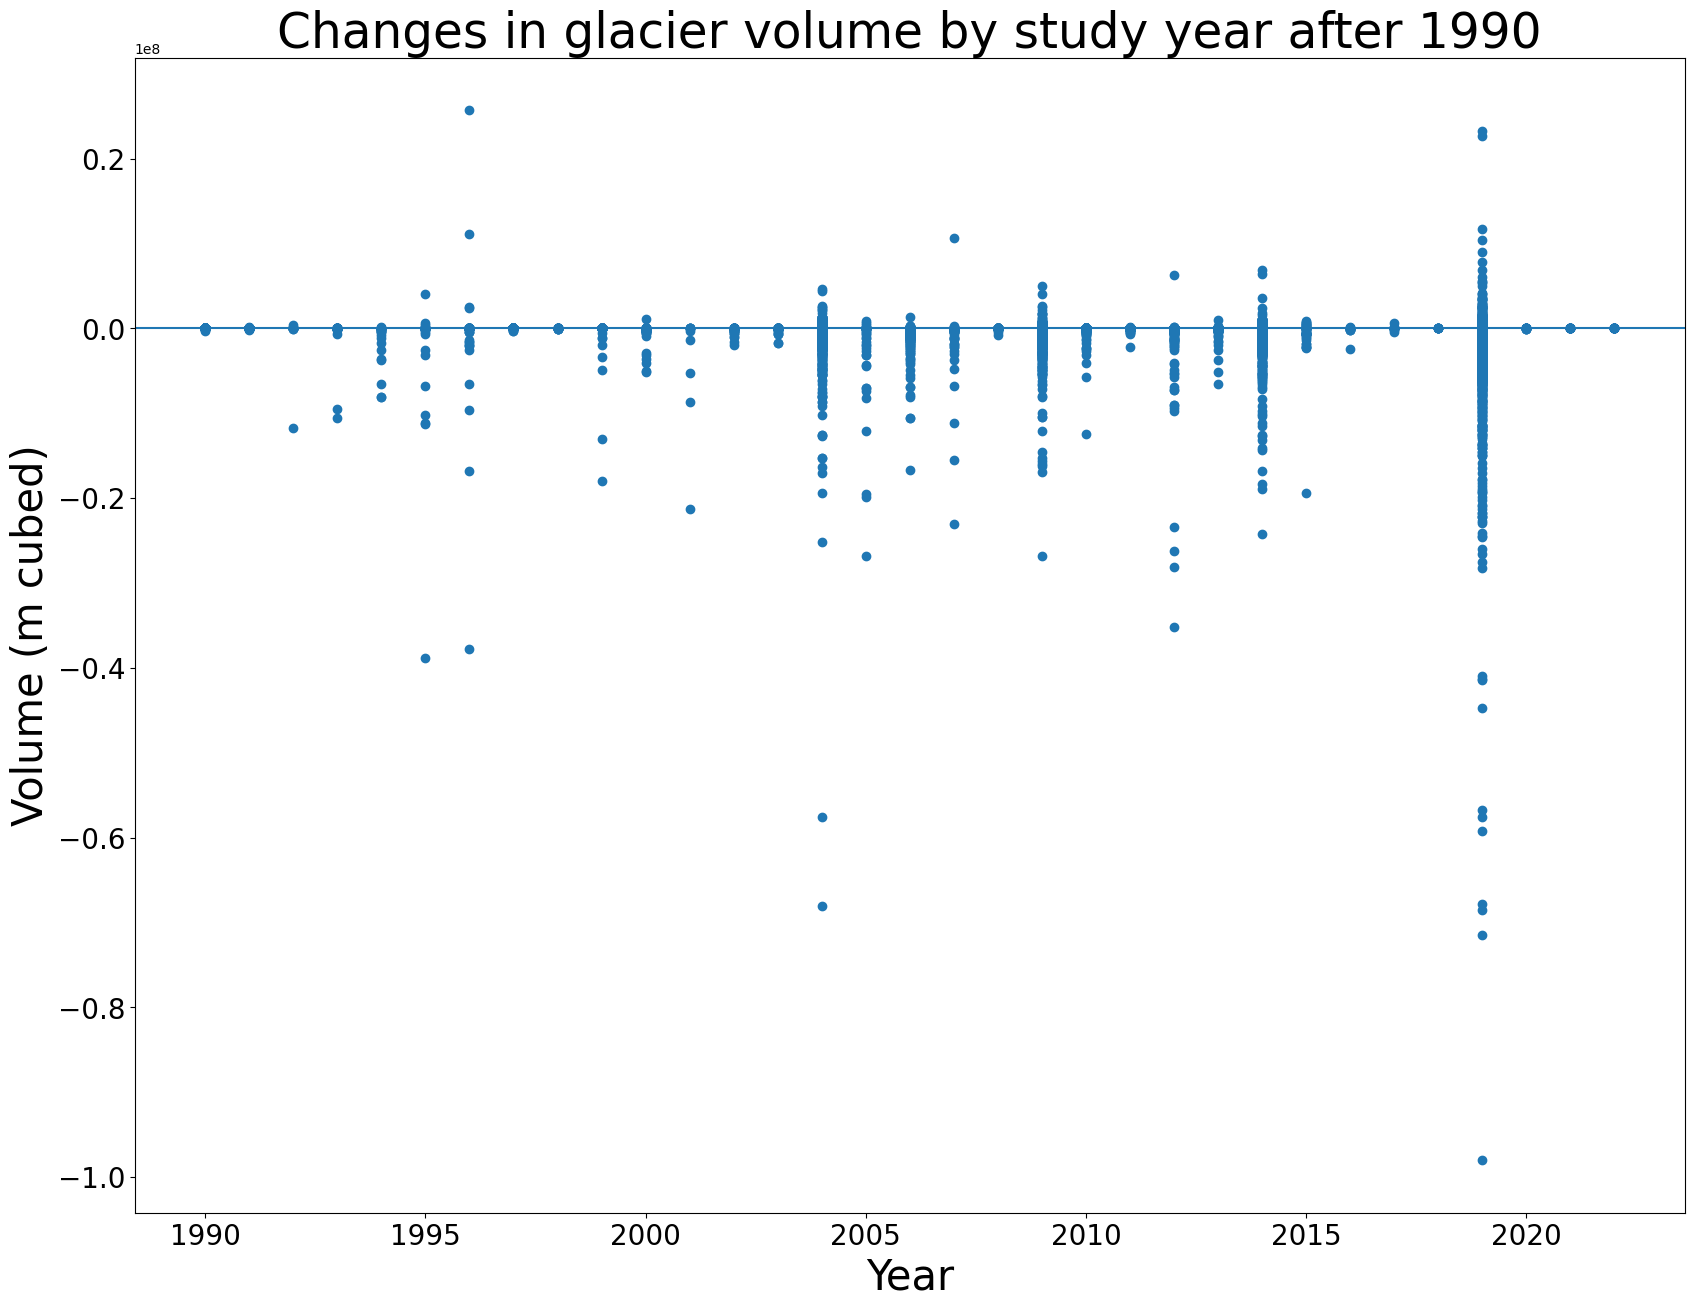

In [ ]:
x = df_vol['YEAR']
y = df_vol[['VOLUME_CHANGE']]
plt.figure(figsize=(20, 15))
plt.plot(x, y, 'o')

plt.title("Changes in glacier volume by study year after 1990", fontsize=35)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Volume (m cubed)", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y = 0, linestyle = '-')
plt.show()

*Caption*: This scatterplot shows the change in glacier volume by year of study, at and after 1990 with some very large negative extreme values removed. Within each year, each point represents a different glacier. It is evident that there are more reductions in glacier volume than there are increases for most years, with these negative changes becoming larger with increasing years.

In [ ]:
# subset for 2019 data
df_19_th = df_2[(df_2['YEAR'] == 2019)]
df_19_vol = df_vol[(df_vol['YEAR'] == 2019)]

df_19_th
df_19_vol

,POLITICAL_UNIT,YEAR,THICKNESS_CHG,VOLUME_CHANGE
1133403,US,2019,-1640.0,-95.0
1053648,US,2019,-610.0,-15.0
1025316,US,2019,-3690.0,-4346860.0
965310,SJ,2019,-2780.0,-51720.0
964927,SJ,2019,1490.0,1870.0
...,...,...,...,...
546743,GE,2019,-12880.0,-2880.0
547616,GE,2019,-12865.0,-2200.0
546746,GE,2019,-2715.0,-605.0
546748,GE,2019,-5580.0,-560.0


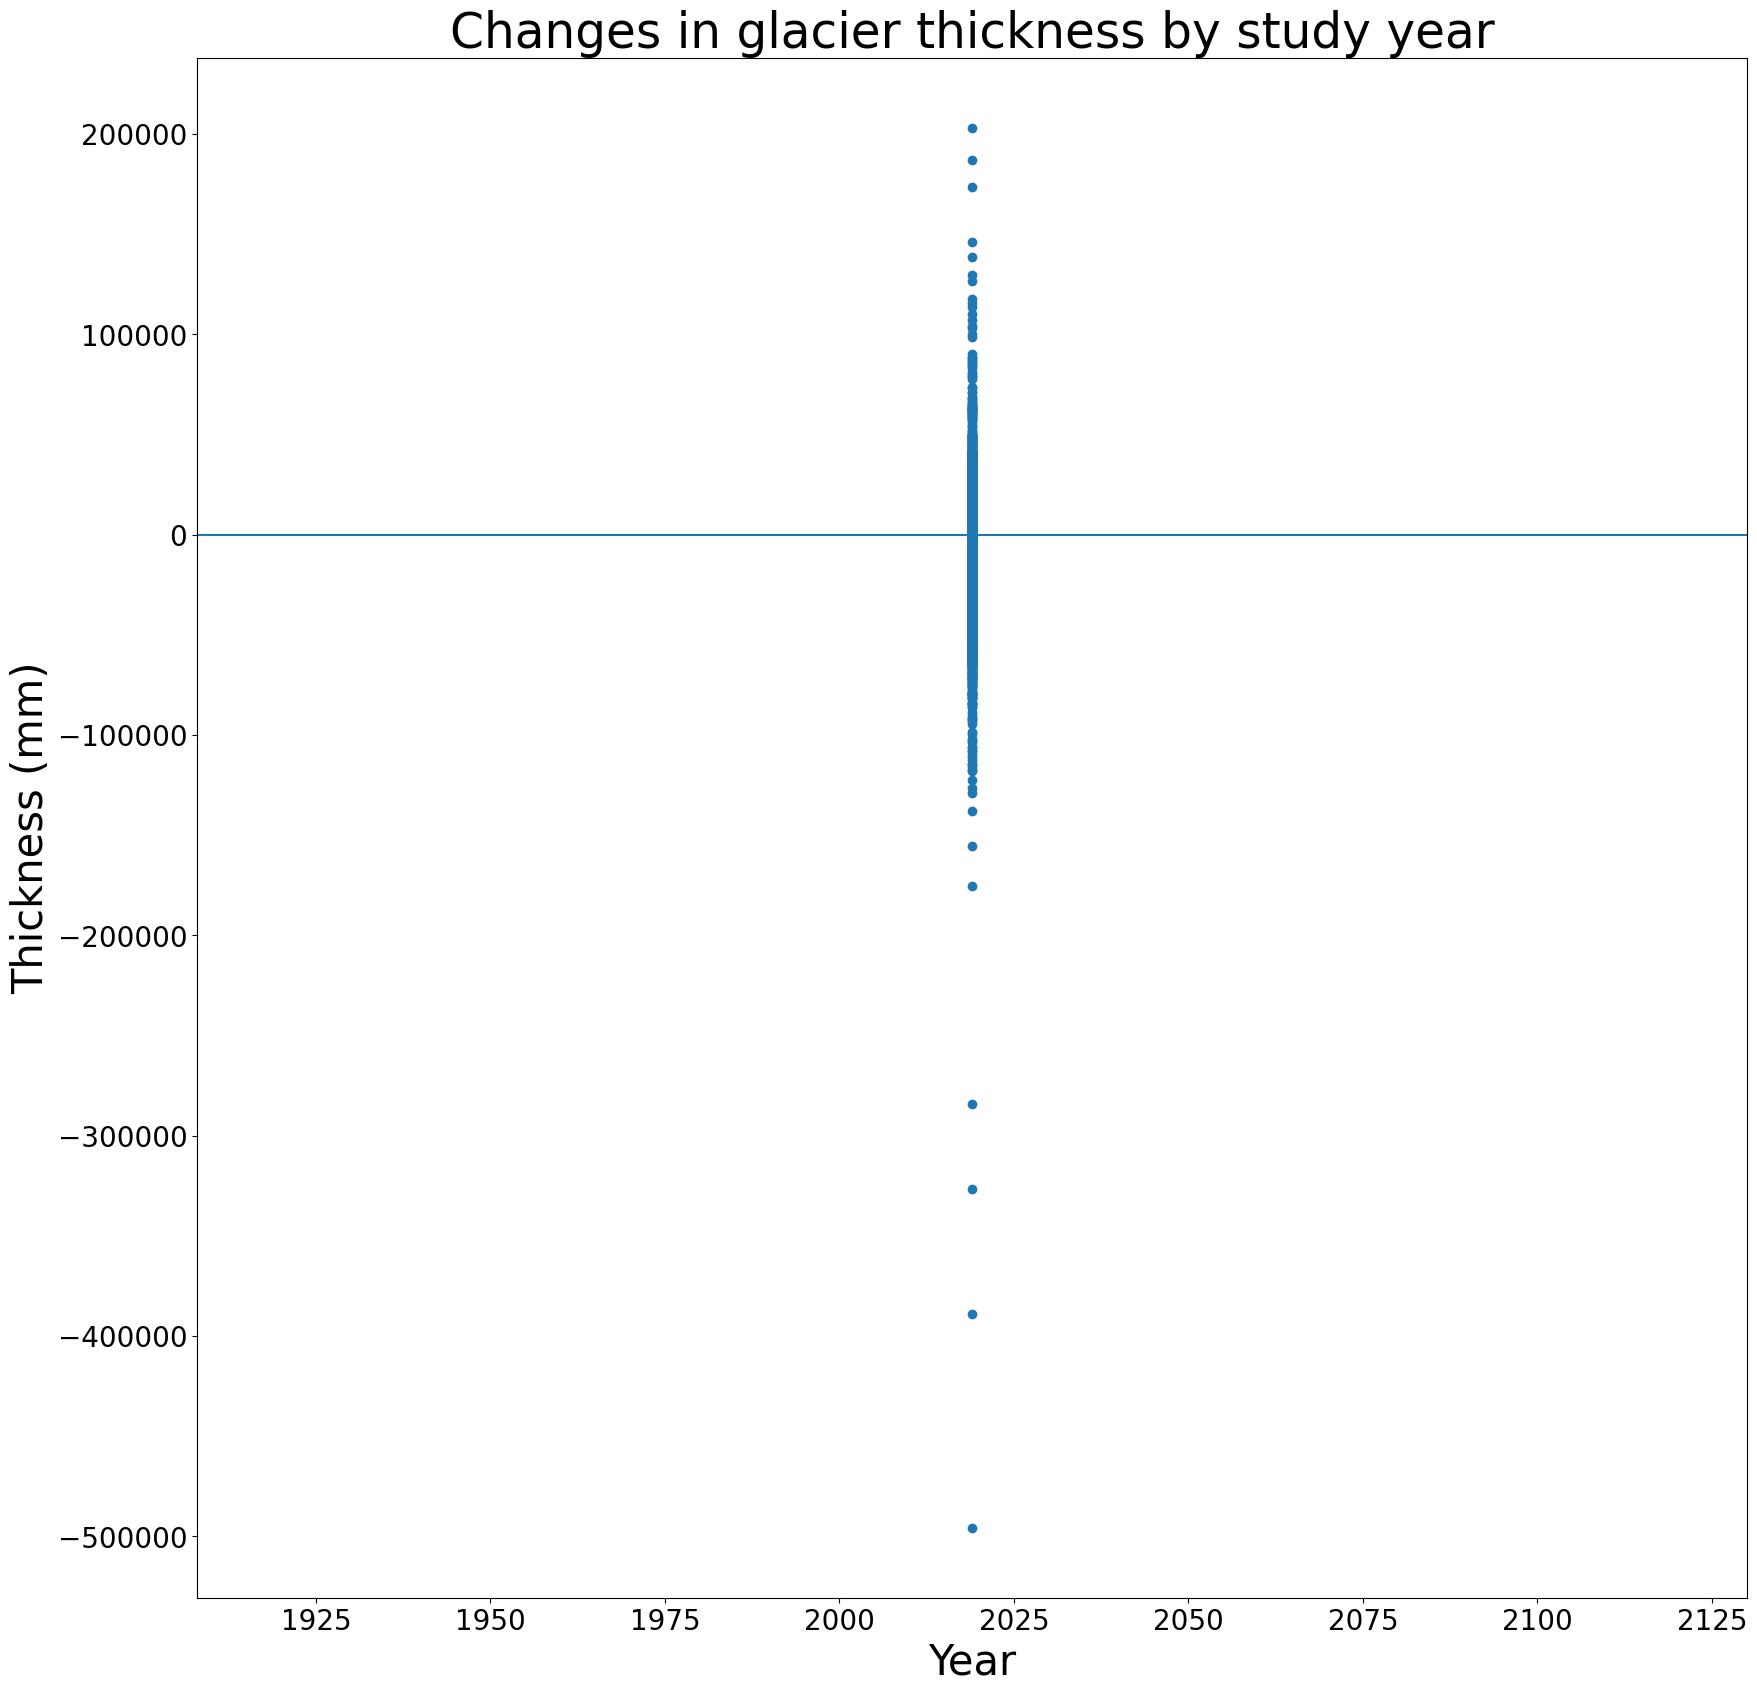

In [ ]:
# plot 2019 thickness data

x = df_19_th['YEAR']
y = df_19_th[['THICKNESS_CHG']]
plt.figure(figsize=(20, 20))
plt.plot(x, y, 'o')

plt.title("Changes in glacier thickness by study year", fontsize=35)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Thickness (mm)", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y = 0, linestyle = '-')
plt.show()

In [ ]:
# select major countries: CA, CN, GL
df_CA = df_vol[(df_vol['POLITICAL_UNIT'] == "CA")]
df_CN = df_vol[(df_vol['POLITICAL_UNIT'] == "CN")]
df_GL = df_vol[(df_vol['POLITICAL_UNIT'] == "GL")]

In [ ]:
# plot only these countries
x = df_vol3['YEAR']
y = df_vol3['VOLUME_CHANGE']
plt.figure(figsize=(20, 20))

plt.plot(x, y, 'o')

x1 = df_CA['YEAR']
y1 = df_CA['VOLUME_CHANGE']

x2 = df_CN['YEAR']
y2 = df_CN['VOLUME_CHANGE']

x3 = df_GL['YEAR']
y3 = df_GL['VOLUME_CHANGE']

plt.plot(x1, y1, 'o', label="Canada")
plt.plot(x2, y2, 'o', label="China")
plt.plot(x3, y3, 'o', label="Greenland")

plt.title("Changes in glacier volume by study year from three major countries", fontsize=35)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Volume (km cubed)", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='lower left', fontsize=20)
plt.show()

Deemed it isn't useful to subset by location, since too many of the studies were conducted in the same year. Idea scrapped!

In [ ]:
# plot subsetting by location using seaborn
# set figure size and style
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style("white")
#ax = plt.subplots(figsize=(20, 20))

# select legend location
#plt.legend(loc='lower left')

# plot scatterplot
sns.scatterplot(data=df_vol, x='YEAR', y='VOLUME_CHANGE', hue='POLITICAL_UNIT')
plt.legend(loc='lower left', title='Country')